In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 1. Data Acquisition and Data Wrangling

Data comes from World Bank: http://data.worldbank.org/country

In [68]:
# Load data, clean up, and organize into two DataFrames.

india_path = '~/Google Drive/Data Analytics Files/Personal Projects/Country Comparison/CSVs/API_IND_DS2_en_csv_v2.csv'
china_path = '~/Google Drive/Data Analytics Files/Personal Projects/Country Comparison/CSVs/API_CHN_DS2_en_csv_v2.csv'

india_df = pd.read_csv(india_path, skiprows=4, index_col='Indicator Name')
china_df = pd.read_csv(china_path, skiprows=4, index_col='Indicator Name')

def cleaner(x):
    x = x.drop(['Country Name', 'Unnamed: 60', 'Indicator Code', 'Country Code'], axis=1)
    x = x.T
    return x

india_df = cleaner(india_df)
china_df = cleaner(china_df)

# 2. Exploratory Data Analysis

In [69]:
# Get a quick look at DataFrames using head() method.

india_df.head()

Indicator Name,"Agricultural machinery, tractors",Fertilizer consumption (% of fertilizer production),Fertilizer consumption (kilograms per hectare of arable land),Agricultural land (sq. km),Agricultural land (% of land area),Arable land (hectares),Arable land (hectares per person),Arable land (% of land area),Land under cereal production (hectares),Permanent cropland (% of land area),...,Account at a financial institution (% age 15+) [ts],"Account at a financial institution, male (% age 15+) [ts]","Account at a financial institution, female (% age 15+) [ts]","Account at a financial institution, income, poorest 40% (% ages 15+) [ts]","Account at a financial institution, income, richest 60% (% ages 15+) [ts]",Mobile account (% age 15+) [w2],"Mobile account, male (% age 15+) [w2]","Mobile account, female (% age 15+) [w2]","Mobile account, income, poorest 40% (% ages 15+) [w2]","Mobile account, income, richest 60% (% ages 15+) [w2]"
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,31016.0,NaN,NaN,1749520.0,58.843195,155806000.0,0.339675,52.403647,92239016.0,1.742236,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962,35000.0,NaN,NaN,1764820.0,59.357794,156700000.0,0.334790,52.704334,93852008.0,1.917133,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963,40000.0,NaN,NaN,1761540.0,59.247475,157470000.0,0.329621,52.963315,93571016.0,1.540433,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964,44000.0,NaN,NaN,1767120.0,59.435152,157732000.0,0.323427,53.051436,94306008.0,1.475183,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
china_df.head()

Indicator Name,"Agricultural machinery, tractors",Fertilizer consumption (% of fertilizer production),Fertilizer consumption (kilograms per hectare of arable land),Agricultural land (sq. km),Agricultural land (% of land area),Arable land (hectares),Arable land (hectares per person),Arable land (% of land area),Land under cereal production (hectares),Permanent cropland (% of land area),...,Account at a financial institution (% age 15+) [ts],"Account at a financial institution, male (% age 15+) [ts]","Account at a financial institution, female (% age 15+) [ts]","Account at a financial institution, income, poorest 40% (% ages 15+) [ts]","Account at a financial institution, income, richest 60% (% ages 15+) [ts]",Mobile account (% age 15+) [w2],"Mobile account, male (% age 15+) [w2]","Mobile account, female (% age 15+) [w2]","Mobile account, income, poorest 40% (% ages 15+) [w2]","Mobile account, income, richest 60% (% ages 15+) [w2]"
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,52661.0,NaN,NaN,3423500.0,36.465795,102600000.0,0.155377,10.928554,89712000.0,0.186403,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962,55360.0,NaN,NaN,3451000.0,36.758714,102300000.0,0.153657,10.896599,88910008.0,0.191729,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963,59657.0,NaN,NaN,3479500.0,37.062285,102100000.0,0.149633,10.875296,90371008.0,0.197055,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964,66290.0,NaN,NaN,3508000.0,37.365856,101900000.0,0.145914,10.853993,92086008.0,0.202381,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [195]:
# Display list of all parameters for reference.

for col in india_df.columns:
    print col

Agricultural machinery, tractors
Fertilizer consumption (% of fertilizer production)
Fertilizer consumption (kilograms per hectare of arable land)
Agricultural land (sq. km)
Agricultural land (% of land area)
Arable land (hectares)
Arable land (hectares per person)
Arable land (% of land area)
Land under cereal production (hectares)
Permanent cropland (% of land area)
Rural land area where elevation is below 5 meters (sq. km)
Rural land area where elevation is below 5 meters (% of total land area)
Urban land area where elevation is below 5 meters (sq. km)
Urban land area where elevation is below 5 meters (% of total land area)
Land area where elevation is below 5 meters (% of total land area)
Forest area (sq. km)
Forest area (% of land area)
Agricultural irrigated land (% of total agricultural land)
Average precipitation in depth (mm per year)
Land area (sq. km)
Rural land area (sq. km)
Urban land area (sq. km)
Agricultural machinery, tractors per 100 sq. km of arable land
Cereal produ

In [184]:
# Create dicts containing all of the years for which data is available for all columns in each of the two DataFrames. 
# These dicts, when combined, can then be used as a mask to compare the countries across all the variables for only
# the years for which both countries have data.

india_yrs = {}
for col in india_df.columns:
    india_yrs[col] = [x for x in india_df[col].index if (not np.isnan(india_df[col][x])) and (india_df[col][x] != 0)]

china_yrs = {}
for col in china_df.columns:
    china_yrs[col] = [x for x in china_df[col].index if (not np.isnan(china_df[col][x])) and (china_df[col][x] != 0)]

both_yrs = {}
for key in india_yrs:
    both_yrs[key] = india_yrs[key] and china_yrs[key]

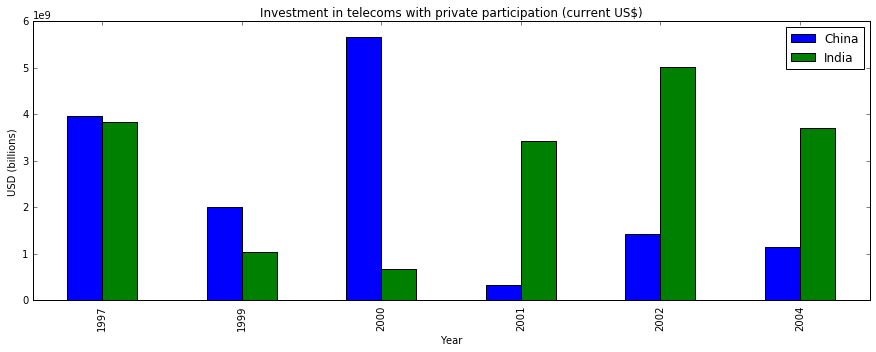

In [206]:
# Try out mask dict to compare two countries on random parameter.

parameter = 'Investment in telecoms with private participation (current US$)'
comparison = pd.DataFrame({'India': india_df[parameter][both_yrs[parameter]],
             'China': china_df[parameter][both_yrs[parameter]]})
comparison.plot.bar(figsize=(15,5))

plt.title(parameter)
plt.xlabel('Year')
plt.ylabel('USD (billions)')

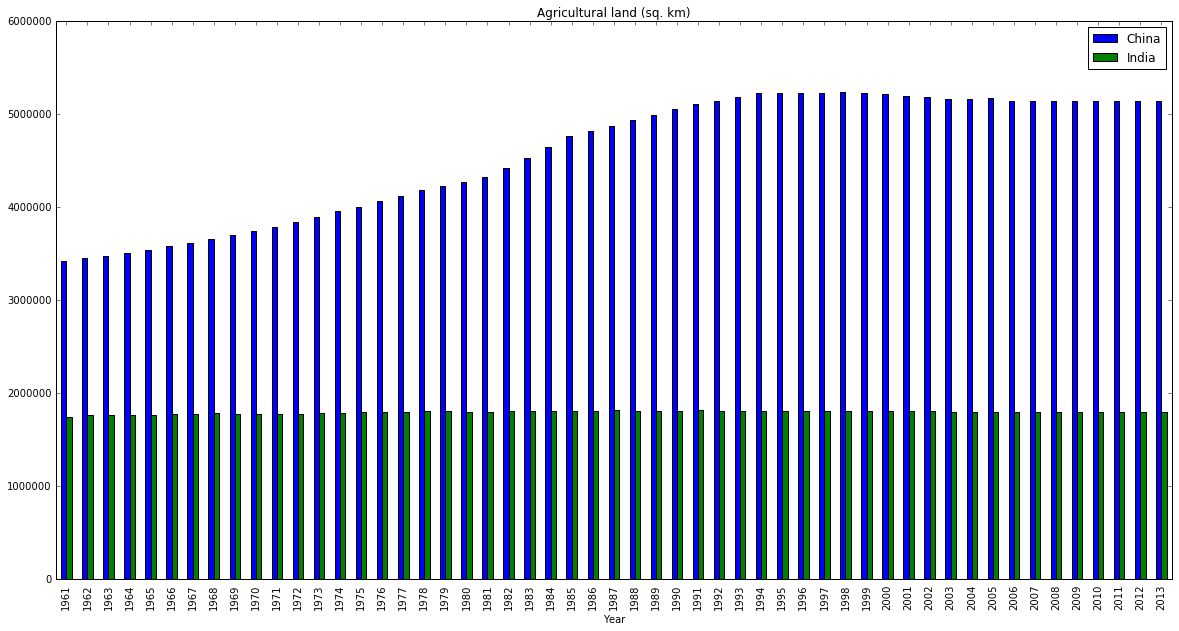

In [256]:
# Create function to generate above bar graph for any of the 1,420 parameters.

def bar_compare(parameter):
    comparison = pd.DataFrame({'India': india_df[parameter][both_yrs[parameter]],
             'China': china_df[parameter][both_yrs[parameter]]})
    comparison.plot.bar(figsize=(20,10))
    plt.title(parameter)
    plt.xlabel('Year')

bar_compare('Agricultural land (sq. km)')

In [267]:
# Find out how many parameters are related to energy.

keywords = ('Energy energy Electricity electricity').split()

energy_params = []
for col in india_df.columns:
    if any(word in col for word in keywords):
        energy_params.append(col)
        

print len(energy_params)
energy_params

32


['Energy intensity level of primary energy (MJ/$2011 PPP GDP)',
 'Access to electricity, rural (% of rural population)',
 'Access to electricity, urban (% of urban population)',
 'Access to electricity (% of population)',
 'Electricity production from coal sources (% of total)',
 'Electricity production from oil, gas and coal sources (% of total)',
 'Electricity production from hydroelectric sources (% of total)',
 'Electricity production from natural gas sources (% of total)',
 'Electricity production from nuclear sources (% of total)',
 'Electricity production from oil sources (% of total)',
 'Renewable electricity output (% of total electricity output)',
 'Electricity production from renewable sources, excluding hydroelectric (kWh)',
 'Electricity production from renewable sources, excluding hydroelectric (% of total)',
 'Renewable energy consumption (% of total final energy consumption)',
 'GDP per unit of energy use (PPP $ per kg of oil equivalent)',
 'GDP per unit of energy use (

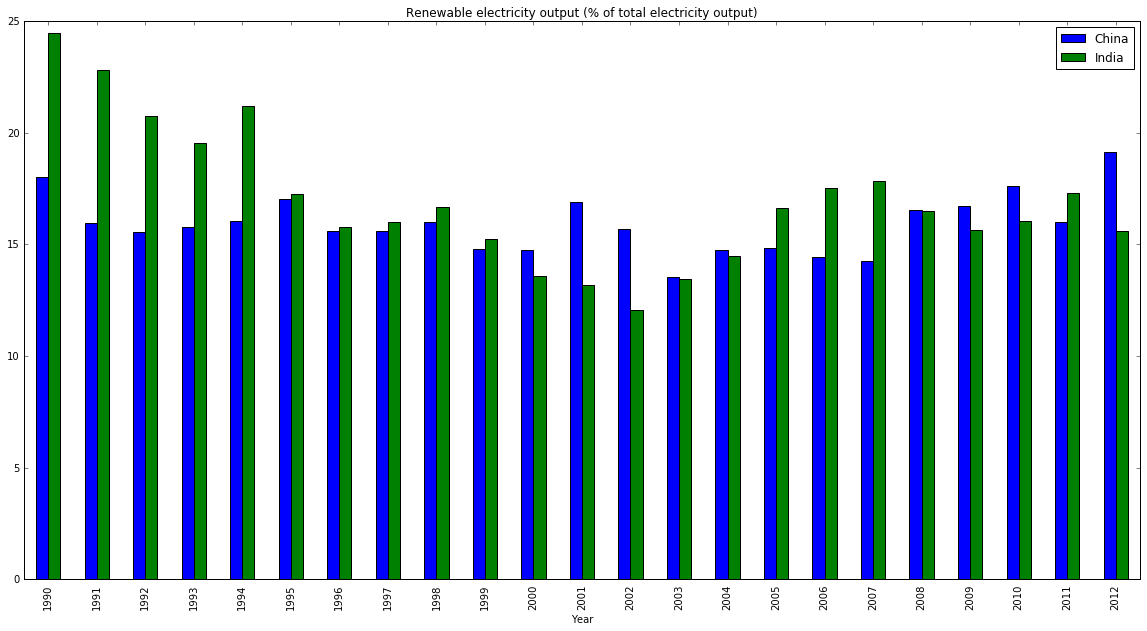

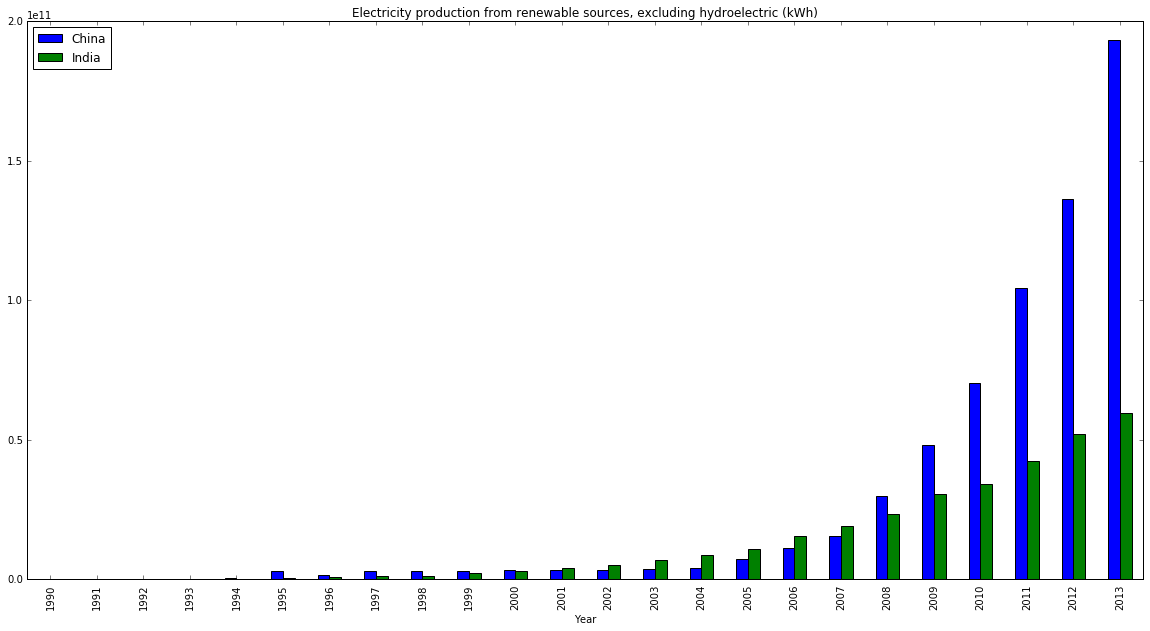

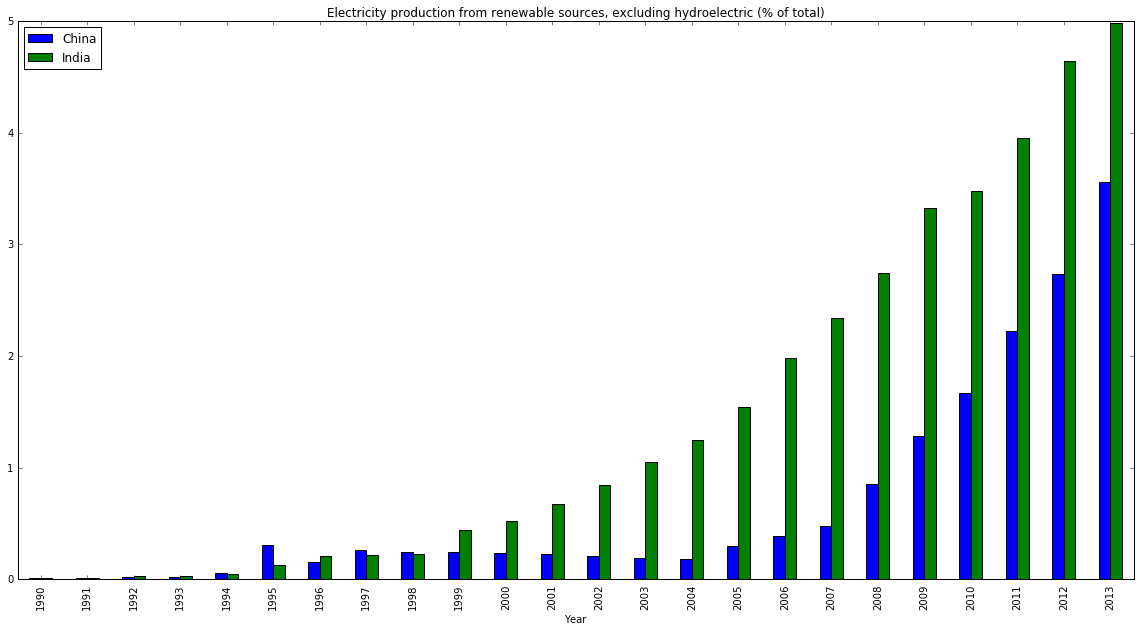

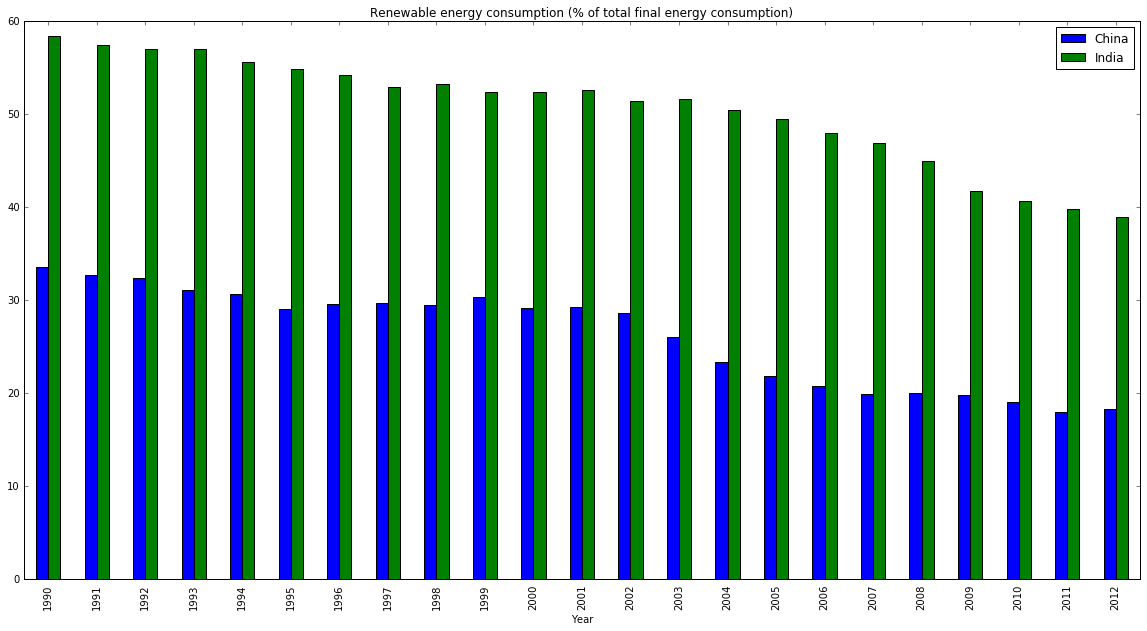

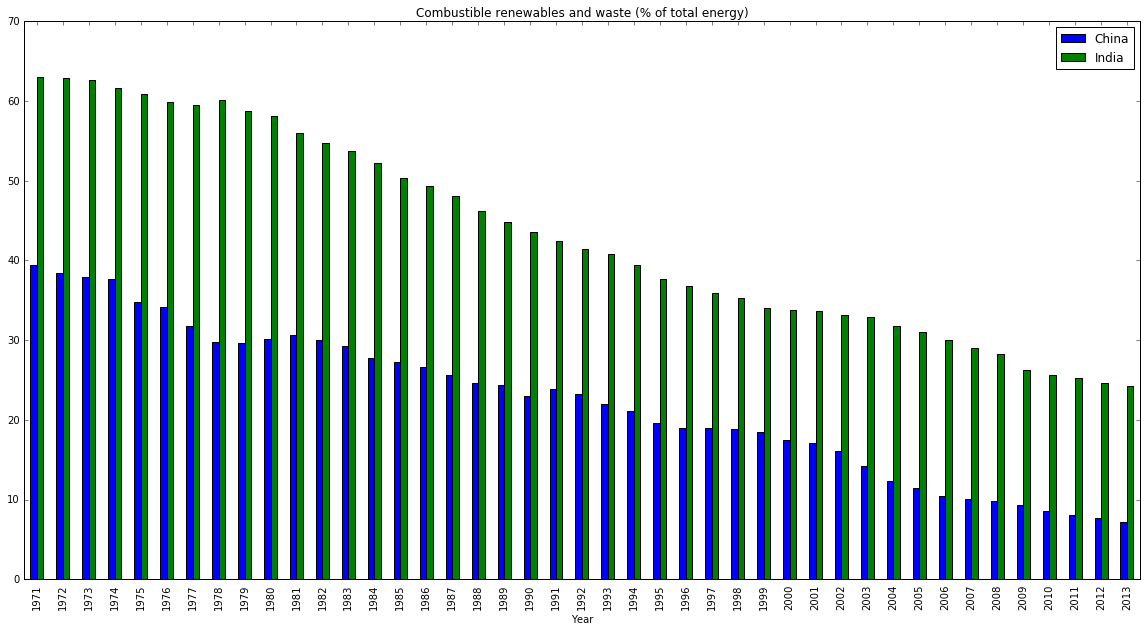

In [272]:
# Have a look a couple comparison bar charts related to renewable energy.

for param in energy_params:
    if 'renewable' in param.lower():
        bar_compare(param)